In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

Funnel: 1.home page - 2.search page - 3.payment page - 4.confirmation page(payment comfirmation)

# Import Data

In [2]:
user = pd.read_csv("user_table.csv")
home_page = pd.read_csv("home_page_table.csv")
search_page = pd.read_csv("search_page_table.csv")
paymt_page = pd.read_csv("payment_page_table.csv")
comfr_page = pd.read_csv("payment_confirmation_table.csv")

In [3]:
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [4]:
home_page

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page
...,...,...
90395,456851,home_page
90396,128619,home_page
90397,167290,home_page
90398,437765,home_page


# Data Processing

In [5]:
tables = {'user':user, 
          'home_page':home_page, 
          'search_page':search_page,
          'paymt_page':paymt_page, 
          'comfr_page':comfr_page}

## check each table

##### Check missing value and uniqueness value of each column and dimiension of table

In [6]:
for table in tables.keys():
    print(table, 'table ------------------------------------------------------------')
    #checking missing value
    print('missing value:')
    print(tables[table].isnull().sum())    
    #checking values in each columns except user_id
    print('value of each columns:')
    for col in tables[table].columns[1:]:
        if col != 'date':
            print(col, ': ', tables[table][col].unique())
    #checking the uniqueness of user_id
    print('No. of id duplication:', tables[table]['user_id'].duplicated().sum())
    #dim of each tabel
    print('dimension of table: ', user.shape)
    print('\n')
        

user table ------------------------------------------------------------
missing value:
user_id    0
date       0
device     0
sex        0
dtype: int64
value of each columns:
device :  ['Desktop' 'Mobile']
sex :  ['Female' 'Male']
No. of id duplication: 0
dimension of table:  (90400, 4)


home_page table ------------------------------------------------------------
missing value:
user_id    0
page       0
dtype: int64
value of each columns:
page :  ['home_page']
No. of id duplication: 0
dimension of table:  (90400, 4)


search_page table ------------------------------------------------------------
missing value:
user_id    0
page       0
dtype: int64
value of each columns:
page :  ['search_page']
No. of id duplication: 0
dimension of table:  (90400, 4)


paymt_page table ------------------------------------------------------------
missing value:
user_id    0
page       0
dtype: int64
value of each columns:
page :  ['payment_page']
No. of id duplication: 0
dimension of table:  (90400, 4)

## concate tables

In [7]:
data = user
col_names = data.columns
for table in list(tables.keys())[1:]:
    data = pd.merge(data, tables[table], how='left', on='user_id')
    col_names = np.append(col_names, table)
data.columns = col_names
data

C:\Users\CT\AppData\Local\Temp/ipykernel_15696/2315299648.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'page_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = pd.merge(data, tables[table], how='left', on='user_id')


,user_id,date,device,sex,home_page,search_page,paymt_page,comfr_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,home_page,NaN,NaN,NaN
90396,642989,2015-02-08,Desktop,Female,home_page,search_page,NaN,NaN
90397,659645,2015-04-13,Desktop,Male,home_page,search_page,NaN,NaN
90398,359779,2015-03-23,Desktop,Male,home_page,NaN,NaN,NaN


## replace data
##### replace all pageview record columns with 1 and 0. (1 means users landed on this page, 0 means users not)

In [8]:
data.isnull().sum()

user_id            0
date               0
device             0
sex                0
home_page          0
search_page    45200
paymt_page     84370
comfr_page     89948
dtype: int64

##### replace all str in pageview columns with 1
- tips: replace str before fillna, or data type will be object.

In [9]:
data.iloc[: ,4:8] = data.iloc[: ,4:8].replace(to_replace= r'_page?', value=1  , regex=True)
data

,user_id,date,device,sex,home_page,search_page,paymt_page,comfr_page
0,450007,2015-02-28,Desktop,Female,1,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,1,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,1,1,NaN,NaN
3,190794,2015-02-18,Desktop,Female,1,1,NaN,NaN
4,537909,2015-01-15,Desktop,Male,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,1,NaN,NaN,NaN
90396,642989,2015-02-08,Desktop,Female,1,1,NaN,NaN
90397,659645,2015-04-13,Desktop,Male,1,1,NaN,NaN
90398,359779,2015-03-23,Desktop,Male,1,NaN,NaN,NaN


##### replace all NaN with 0

In [10]:
data.fillna(0, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      90400 non-null  int64 
 1   date         90400 non-null  object
 2   device       90400 non-null  object
 3   sex          90400 non-null  object
 4   home_page    90400 non-null  int64 
 5   search_page  90400 non-null  int64 
 6   paymt_page   90400 non-null  int64 
 7   comfr_page   90400 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.2+ MB


In [12]:
data

,user_id,date,device,sex,home_page,search_page,paymt_page,comfr_page
0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0
...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,1,0,0,0
90396,642989,2015-02-08,Desktop,Female,1,1,0,0
90397,659645,2015-04-13,Desktop,Male,1,1,0,0
90398,359779,2015-03-23,Desktop,Male,1,0,0,0


# Data Visualisation

In [14]:
data_groupby_device = data.groupby('device')
data_cot_dev = data_groupby_device.sum()
data_cot_dev = data_cot_dev.iloc[: ,1:5]
data_cot_dev

,home_page,search_page,paymt_page,comfr_page
device,,,,
Desktop,60200,30100,3010,150
Mobile,30200,15100,3020,302


In [76]:
no_col = data_cot_dev.shape[1]
data_cov_dev = data_cot_dev.copy()
for i in range(no_col):
    if i == 0:
        data_cov_dev.iloc[:,i] = round(data_cov_dev.iloc[:,i] / data_cot_dev.iloc[:,i], 4)
    else:
        data_cov_dev.iloc[:,i] = round(data_cov_dev.iloc[:,i] / data_cot_dev.iloc[:,i-1], 4)
data_cov_dev

,home_page,search_page,paymt_page,comfr_page
device,,,,
Desktop,1.0,0.5,0.1,0.0498
Mobile,1.0,0.5,0.2,0.1000


##### Transform width format to long format

In [77]:
data_cov_dev = data_cov_dev.reset_index()
data_cov_dev = data_cov_dev.melt(id_vars='device', var_name='page', value_name='conversion_rate')
data_cov_dev

,device,page,conversion_rate
0,Desktop,home_page,1.0000
1,Mobile,home_page,1.0000
2,Desktop,search_page,0.5000
3,Mobile,search_page,0.5000
4,Desktop,paymt_page,0.1000
5,Mobile,paymt_page,0.2000
6,Desktop,comfr_page,0.0498
7,Mobile,comfr_page,0.1000


In [97]:
data_cov_dev[data_cov_dev['device']=='Desktop']['conversion_rate']

0    1.0000
2    0.5000
4    0.1000
6    0.0498
Name: conversion_rate, dtype: float64

Text(0.5, 1.0, 'Conversion Rate by Device')

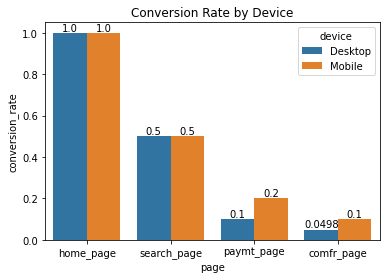

In [104]:
p = sns.barplot(x='page', y='conversion_rate', hue='device', data=data_cov_dev)

label_desk = data_cov_dev[data_cov_dev['device']=='Desktop']['conversion_rate']
p.bar_label(p.containers[0],label_desk)
label_mobl = data_cov_dev[data_cov_dev['device']=='Mobile']['conversion_rate']
p.bar_label(p.containers[1],label_mobl)
p.set_title('Conversion Rate by Device')